In [35]:
import numpy as np
from Logistic_regression import Logistic_regression
from utils import filter_values, load_usps, display_image, one_againt_others
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
datax, datay = load_usps("USPS/usps_train.txt")
datax_test, datay_test = load_usps("USPS/usps_test.txt")
datax, datay = filter_values(datax, datay, 0, 1)
datax_test, datay_test = filter_values(datax_test, datay_test, 0, 1)

In [3]:
scores = []
for eps in np.linspace(0.001, 0.1, 5):
    print(eps)
    reg = Logistic_regression(10, eps)
    model = reg.fit(datax, datay)
    s,_ = model.score(datax_test, datay_test)
    print(s)
    scores.append(s)

0.001
0.9454253611556982
0.02575


/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/TME3/Logistic_regression.py:16: RuntimeWarning: overflow encountered in exp
  d_W[i] = -sum([-(2 * Y[j] - 1) * X[j, i] * (1 / (1 + np.exp(-(2 * Y[j] - 1) * np.dot(W.T, X[j])))) for j in range(len(X))])
/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/TME3/Logistic_regression.py:11: RuntimeWarning: overflow encountered in exp
  return -sum([np.log(1 + np.exp(-(2 * Y[i] - 1) * np.dot(W.T, X[i]))) for i in range(len(X))])


0.7945425361155698
0.0505
0.9871589085072231
0.07525
0.9775280898876404
0.1
0.9839486356340289


In [11]:
reg = Logistic_regression(10, 0.025)
model = reg.fit(datax, datay)
score,_ = model.score(datax_test, datay_test)
prediction = model.predict(datax_test)

In [14]:
prediction

array([-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,
       -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
        1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1

Les scores sont tous pareil, maais le pas de gradient >= 0.1 se semble de poser les problems. Donc je vais travailler avec eps = 0.025

In [6]:
from cross_validation import validation_croisee
datax, datay = load_usps("USPS/usps_train.txt")
datax, datay = filter_values(datax, datay, 0, 1)

In [8]:
eps = 0.025
reg = Logistic_regression(20, eps)
score = validation_croisee(datax, datay, reg,5)


KeyboardInterrupt: 

In [7]:
results = []
for eps in np.linspace(0.001, 0.1, 5):
    reg = Logistic_regression(10, eps)
    score = validation_croisee(datax, datay, reg,5)
    print(score)
    results.append(score)

0.962726237316
0.998180782771


/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/TME3/Logistic_regression.py:16: RuntimeWarning: overflow encountered in exp
  d_W[i] = -sum([-(2 * Y[j] - 1) * X[j, i] * (1 / (1 + np.exp(-(2 * Y[j] - 1) * np.dot(W.T, X[j])))) for j in range(len(X))])
/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/TME3/Logistic_regression.py:11: RuntimeWarning: overflow encountered in exp
  return -sum([np.log(1 + np.exp(-(2 * Y[i] - 1) * np.dot(W.T, X[i]))) for i in range(len(X))])


0.991355353075
0.992727272727
0.983180782771


/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/TME3/Logistic_regression.py:16: RuntimeWarning: overflow encountered in exp
  d_W[i] = -sum([-(2 * Y[j] - 1) * X[j, i] * (1 / (1 + np.exp(-(2 * Y[j] - 1) * np.dot(W.T, X[j])))) for j in range(len(X))])
/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/TME3/Logistic_regression.py:11: RuntimeWarning: overflow encountered in exp
  return -sum([np.log(1 + np.exp(-(2 * Y[i] - 1) * np.dot(W.T, X[i]))) for i in range(len(X))])


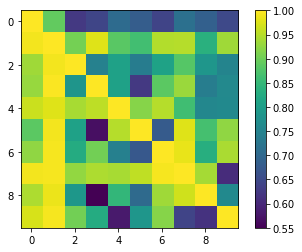

In [23]:
eps = 0.025
results = np.zeros((10,10))
datax, datay = load_usps("USPS/usps_train.txt")
for i in range(10):
    for j in range(10):
        if i == j:
            results[i,j] = 1
        else:
            X, Y = filter_values(datax, datay, i, j)
            reg = Logistic_regression(10, eps)
            score = validation_croisee(X, Y, reg,5)
            results[i,j] = score
            
plt.imshow(results)
plt.colorbar()
plt.show()

In [30]:
plt.imshow(results)
plt.ylabel("classe -1")
plt.xlabel("classe 1")
plt.colorbar()
plt.savefig('../compte_rendu/TME1_6/images/tme3/logistic_one_vs_one.png')

In [34]:
plt.hist(datay)
plt.ylabel("Occurence")
plt.xlabel("Nombre")
plt.savefig('../compte_rendu/TME1_6/images/tme3/USPS_occurences.png')

In [36]:
eps = 0.025
results = []
datax, datay = load_usps("USPS/usps_train.txt")
for i in range(10):
    X, Y = one_againt_others(datax, datay, i)
    reg = Logistic_regression(10, eps)
    score = validation_croisee(X, Y, reg,5)
    results.append(score)
            

In [52]:
plt.plot(np.arange(10),results)
plt.title("Un contre les autres")
plt.xlabel("Nombre")
plt.ylabel("Precision")
axes = plt.gca()
axes.set_ylim([0.7,1])
plt.xticks(np.arange(10))
plt.savefig('../compte_rendu/TME1_6/images/tme3/USPS_one_vs_all.png')

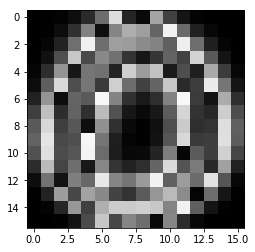

In [73]:
display_image(datax[datay == 0].mean(axis=0))